In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch
import netCDF4 as nc
import xarray as xr
import sys
import lovely_tensors as lt
import torch.nn.functional as F
import numpy as np

lt.monkey_patch()
sys.path.append('/app')

from Dataset import load_data

In [13]:
x = torch.randn(256, 256)
x1 = torch.randn(256, 256)
m1 = torch.ones(256, 128)
m2 = torch.zeros(256, 128)

In [14]:
mask = torch.cat([m1,m2], dim=-1) > 0

In [17]:
F.mse_loss(x[mask], x1[mask]).sqrt().item()

1.4079135656356812

In [4]:
!pip install dask -q

In [3]:
!mkdir ../data

In [4]:
%cd ../data

/app/data


In [5]:
!pwd

/app/data


In [6]:
!gdown 1-R-XtkEN3-pNNdMPUkWyocrq3zZc2W-5
!gdown 1-P_QXP0Rbk-_WMwZQ8X5HgTsVHMNHnRS
!gdown 1-MYjC7QmtPzvr83Iy6Pvehuk45L7gqAv
!gdown 1-8EhjAD_lEqU4dX_ST2G9LNc4sygrVlc
!gdown 1-6ioOM5qFZruL742b1Ou8bIvpwzkk405
!gdown 1-4_o29jv7q-JUklx3nXmHNt5RaVK7e7N
!gdown 1-2LB2RUvJpMcZXa5pLo0wtdv2MWWGp_d
!gdown 1--NY0SagTnlCojuqun-Fg6Lp2hYeRF29
!gdown 15IjYhOXP25tOIwmUlsUAbMcnM8lfMGzX

In [31]:
!./download_data.sh

usage: gdown [-h] [-V] [-O OUTPUT] [-q] [--fuzzy] [--id] [--proxy PROXY]
             [--speed SPEED] [--no-cookies] [--no-check-certificate]
             [--continue] [--folder] [--remaining-ok]
             url_or_id
gdown: error: unrecognized arguments: --print-url
/opt/conda/lib/python3.8/site-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1-R-XtkEN3-pNNdMPUkWyocrq3zZc2W-5
To: /app/data/secchi_depth_2021_2024.nc
100%|███████████████████████████████████████| 1.33G/1.33G [00:10<00:00, 126MB/s]
usage: gdown [-h] [-V] [-O OUTPUT] [-q] [--fuzzy] [--id] [--proxy PROXY]
             [--speed SPEED] [--no-cookies] [--no-check-certificate]
             [--continue] [--folder] [--remaining-ok]
             url_or_id
gdown: error: unrecognized arguments: --print-url
/opt/conda/lib/python3.8/site-packages/g

In [28]:
!chmod +x download_data.sh

In [24]:
%cd /app

/app


In [11]:
1e-3

0.001

In [125]:
from Dataset import load_data

In [3]:
dataloader_test = load_data(16, 16, '/app/data')

Filtered 6400/8504
Filtered 552/732
Filtered 578/791


In [4]:
testloader = dataloader_test[2]

In [5]:
for item in testloader:
    break

In [112]:
testloader

NameError: name 'testloader' is not defined

In [1]:
item

NameError: name 'item' is not defined

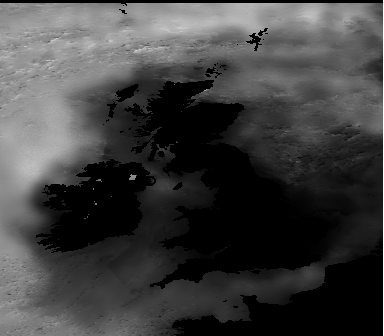

In [9]:
item[0][0][0].repeat(3,1,1).rgb

In [10]:
st = "aaaaAAAaaa"
st, st.lower()

('aaaaAAAaaa', 'aaaaaaaaaa')

In [3]:
dataset = xr.open_mfdataset('/app/data/*.nc', combine='by_coords')
dataset

<xarray.Dataset>
Dimensions:            (time: 9295, lat: 337, lon: 384)
Coordinates:
  * time               (time) datetime64[ns] 1997-09-04 ... 2023-03-01
  * lat                (lat) float32 62.02 61.98 61.94 61.9 ... 48.1 48.06 48.02
  * lon                (lon) float32 -11.98 -11.94 -11.9 ... 3.896 3.938 3.979
Data variables:
    KD490              (time, lat, lon) float32 dask.array<chunksize=(830, 337, 384), meta=np.ndarray>
    ZSD_uncertainty    (time, lat, lon) float32 dask.array<chunksize=(830, 337, 384), meta=np.ndarray>
    KD490_uncertainty  (time, lat, lon) float32 dask.array<chunksize=(830, 337, 384), meta=np.ndarray>
    flags              (time, lat, lon) int8 dask.array<chunksize=(830, 337, 384), meta=np.ndarray>
    ZSD                (time, lat, lon) float32 dask.array<chunksize=(830, 337, 384), meta=np.ndarray>
Attributes: (12/92)
    lon_step:                        0.041666668
    keywords:                        EARTH SCIENCE > OCEANS > OCEAN OPTICS > ...
    cmems_product_id:                OCEANCOLOUR_GLO_BGC_L4_MY_009_104
    lat_step:                        0.041666668
    grid_mapping:                    Equirectangular
    title:                           cmems_obs-oc_glo_bgc-transp_my_l4-gapfre...
    ...                              ...
    westernmost_longitude:           -180.0
    geospatial_vertical_positive:    up
    date_created:                    2023-03-09T13:54:22Z
    nb_valid_bins:                   20803502
    pct_valid_bins:                  55.73640582133059
    History:                         Translated to CF-1.0 Conventions by Netc...

In [4]:
zsd_array = dataset['ZSD'].values
# Create a binary mask identifying the missing values (e.g., NaN values)
missing_mask = np.isnan(zsd_array)
# Count the number of missing values per time stamp
missing_counts = np.sum(missing_mask, axis=(1, 2))
# Convert the resulting NumPy array to a PyTorch tensor
missing_counts_tensor = torch.tensor(missing_counts, dtype=torch.int).unsqueeze(0)

In [5]:
zsd_array.shape

(9295, 337, 384)

In [6]:
from PIL import Image
pil_image = Image.open("../data/surface_mask.png")

mask = np.array(pil_image)[...,0] / 255.
mask.shape

(337, 384)

In [7]:
masked_array = zsd_array*mask

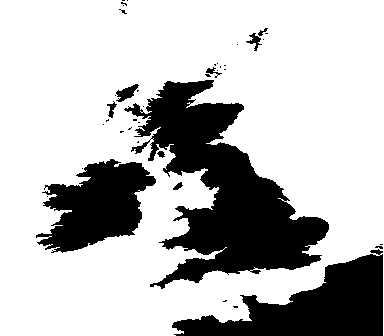

In [11]:
torch.tensor(masked_array[0])[None].repeat(3,1,1).rgb

In [ ]:
patch_h = 32
patch_w = 64

In [ ]:
masked_array[idx+self.seq_len:idx+self.seq_len+self.out_seq_len, :, lon_i:lon_i+self.patch_h, lat_i:lat_i+self.patch_w]

In [ ]:
for i in range(masked_array[0].shape[0]//patch_h):
    for j in range(masked_array[0].shape[1]//patch_w):
        masked_array[lon_i:lon_i+self.patch_h, lat_i:lat_i+self.patch_w]

In [14]:
x = torch.ones(32,64) * -777
x

tensor[32, 64] n=2048 x∈[-777.000, -777.000] μ=-777.000 σ=0.

In [22]:
if x.eq(-777).all():
    print('kek')

kek


In [16]:
x ==-777

tensor[32, 64] bool n=2048 x∈[True, True] μ=1.000 σ=0.

In [13]:
masked_array[0].shape

(337, 384)

In [26]:
patch_array = dataset.get('ZSD').values[:, np.newaxis, :32, :64]

In [18]:
AVG_NAN_COUNT = 33659
threshold = AVG_NAN_COUNT * 1.1

In [46]:
np.isnan(patch_array[777]).sum()

960

In [51]:
patch_array[800]

array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)

In [32]:
torch.tensor(patch_array[777]).repeat(3,1,1).rgb

In [25]:
masked_array[32] -1

array([[20.99929428, 19.97604942, 20.52376938, ..., 16.25721169,
        16.84569931, 16.7794323 ],
       [21.81316376, 21.15744019, 20.63337708, ..., 17.25739288,
        16.66596413, 16.66270256],
       [19.92406082, 20.50233269, 20.47291565, ..., 16.66596413,
        16.66596413, 16.57662964],
       ...,
       [20.74886513, 21.06278419, 21.85153008, ...,         nan,
                nan,         nan],
       [20.69990349, 21.17385674, 21.56196976, ...,         nan,
                nan,         nan],
       [20.1863842 , 20.50395584, 21.38018036, ...,         nan,
                nan,         nan]])

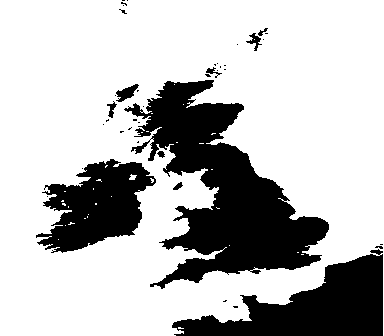

In [16]:
torch.tensor(zsd_array[32])[None].repeat(3,1,1).rgb

In [25]:
data_median = missing_counts_tensor.median().item()
data_min = missing_counts_tensor.min().item()
data_median, data_min

(33667, 33655)

In [32]:
(missing_counts_tensor == data_min)

tensor[1, 9295] bool x∈[False, True] μ=0.003 σ=0.056

In [18]:
missing_counts_tensor > median

tensor[1, 9295] bool x∈[False, True] μ=0.488 σ=0.500

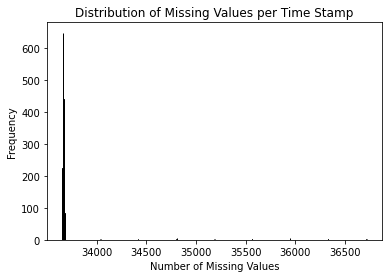

In [149]:
from matplotlib import pyplot as plt

plt.hist(missing_counts[missing_counts < median * 1.1], bins='auto', edgecolor='black')

# Set the title and labels for the plot
plt.title('Distribution of Missing Values per Time Stamp')
plt.xlabel('Number of Missing Values')
plt.ylabel('Frequency')

# Display the plot
plt.show()

In [ ]:
missing_counts > 34000) & (missing_counts < 34000)

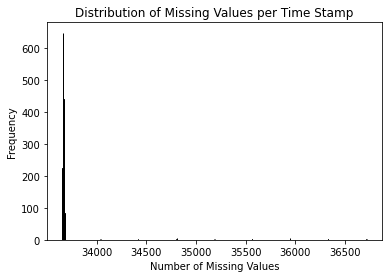

In [100]:
from matplotlib import pyplot as plt

plt.hist(missing_counts[missing_counts < 34000], bins='auto', edgecolor='black')

# Set the title and labels for the plot
plt.title('Distribution of Missing Values per Time Stamp')
plt.xlabel('Number of Missing Values')
plt.ylabel('Frequency')

# Display the plot
plt.show()

In [121]:
min_missing = np.min(missing_counts)
median_missing = np.median(missing_counts)
max_missing = np.max(missing_counts)

# Find the first indexes where the number of missing values matches the specified values
min_index = np.where(missing_counts == min_missing)[0][0]
median_index = np.where(missing_counts == median_missing)[0][0]
max_index = np.where(missing_counts == max_missing)[0][0]
specified_value_index = np.where(missing_counts == 33680)[0][0]
specified_value_index2 = np.where((missing_counts > 34000) & (missing_counts < 34400))#[0][0]

In [122]:
specified_value_index2

(array([ 501,  775, 1960, 2234, 3422, 3696, 4883]),)

In [116]:
min_index, median_index, max_index, specified_value_index

(147, 17, 95, 319)

In [178]:
min_tensor = (torch.nan_to_num(torch.tensor(zsd_array[min_index])[None].repeat(3,1,1)) > 0) *1.
median_tensor = (torch.nan_to_num(torch.tensor(zsd_array[median_index])[None].repeat(3,1,1)) > 0) *1.
max_tensor = (torch.nan_to_num(torch.tensor(zsd_array[max_index])[None].repeat(3,1,1)) > 0) *1.
specific_tensor = (torch.nan_to_num(torch.tensor(zsd_array[specified_value_index])[None].repeat(3,1,1)) > 0) *1.
specific2_tensor = (torch.nan_to_num(torch.tensor(zsd_array[4883])[None].repeat(3,1,1)) > 0) *1.
mask_dif = (torch.eq(mask_tensor, min_tensor)*1.-1.).abs()
mask_dif[0] = 0
max_diff = (torch.eq(max_tensor, min_tensor)*1.-1.).abs()
max_diff[0] = 0
median_diff = (torch.eq(median_tensor, min_tensor)*1.-1.).abs()
median_diff[0] = 0
specific_diff = (torch.eq(specific_tensor, min_tensor)*1.-1.).abs()
specific_diff[0] = 0
specific_diff2 = (torch.eq(specific2_tensor, min_tensor)*1.-1.).abs()
specific_diff2[0] = 0

In [179]:
min_tensor

tensor[3, 337, 384] n=388224 x∈[0., 1.000] μ=0.740 σ=0.439

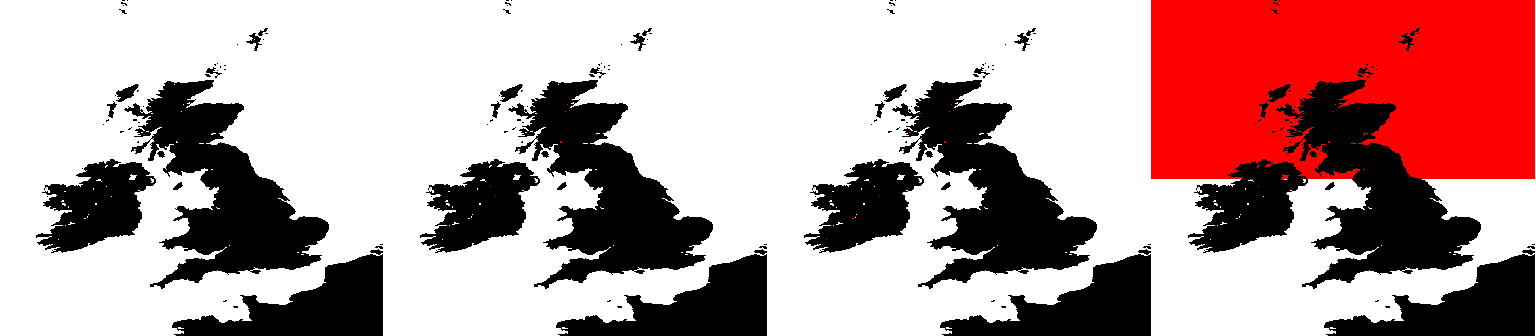

In [180]:
torch.cat([min_tensor, min_tensor-median_diff, min_tensor-specific_diff, min_tensor-max_diff], dim=-1).rgb

In [167]:
pil_image = Image.open("surface_mask.png")

mask_tensor = torch.from_numpy(np.array(pil_image))

# if the image has an alpha channel, remove it
if mask_tensor.shape[2] == 4:
    mask_tensor = mask_tensor[:, :, :3]

# permute the dimensions of the tensor to [3, height, width]
mask_tensor = mask_tensor.permute(2, 0, 1).float()

# normalize the pixel values to the range [0, 1]
mask_tensor = mask_tensor / 255.0

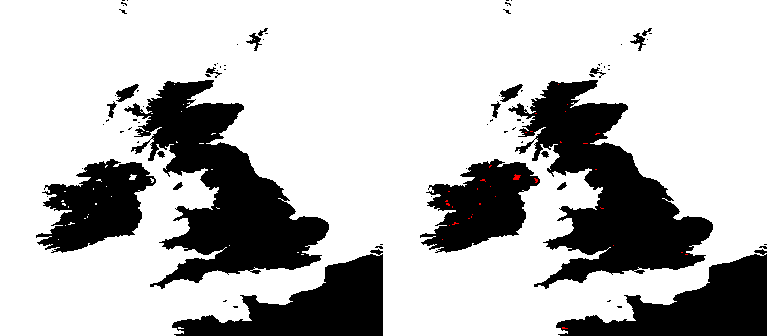

In [181]:
# mask_tensor[0] = 0
mask_dif = (torch.eq(mask_tensor, min_tensor)*1.-1.).abs()
mask_dif[0] = 0
torch.cat([min_tensor, (min_tensor-mask_dif)], dim=-1).rgb

In [165]:
mask_dif

tensor[3, 337, 384] n=388224 x∈[-1.000, 0.] μ=-0.247 σ=0.431

In [154]:
from PIL import Image

tensor_image = (min_tensor * 255).to(torch.uint8)
pil_image = Image.fromarray(tensor_image.permute(1, 2, 0).cpu().numpy())

pil_image.save("min_tensor.png")

In [153]:
tensor_image[(tensor_image>0)&(tensor_image<255)]

tensor[0] u8 empty []

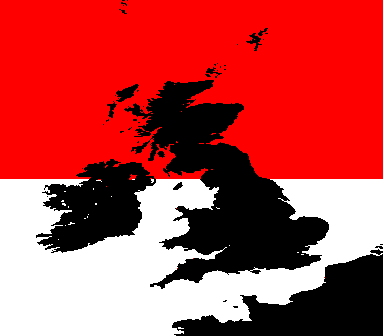

In [92]:
max_diff = (max_tensor-min_tensor).abs()
max_diff[0] = 0
(min_tensor-max_diff).rgb

In [97]:
data = dataset.get('ZSD').values[:, np.newaxis, :, :]
data

array([[[[11.269648, 11.935564, 12.128603, ...,  9.019039,  8.694352,
           9.010489],
         [11.31403 , 11.599874, 12.232048, ...,  9.021213,  9.016381,
           9.011418],
         [11.390637, 11.644765, 11.951759, ...,  8.70319 ,  9.017919,
           9.342732],
         ...,
         [20.59327 , 21.91524 , 21.263618, ...,       nan,       nan,
                nan],
         [21.696327, 21.696327, 21.04003 , ...,       nan,       nan,
                nan],
         [22.143114, 21.481035, 22.143114, ...,       nan,       nan,
                nan]]],


       [[[11.296009, 11.425039, 11.745977, ...,  9.032353,  9.027578,
           9.02275 ],
         [10.949074, 11.209383, 12.167532, ...,  9.362225,  9.029316,
           9.027009],
         [11.768455, 11.668553, 11.91909 , ...,  9.036939,  9.033495,
           8.710012],
         ...,
         [24.98145 , 24.923073, 24.726316, ...,       nan,       nan,
                nan],
         [24.37881 , 25.759493, 24.923073, ..., 

In [111]:
mean = data[(data > 0)].mean()
data[np.isnan(data)] = mean
mean = data.mean(axis=(0,2,3))#.reshape(1, data.shape[1], 1, 1)
std = data.std(axis=(0,2,3))#.reshape(1, data.shape[1], 1, 1)
mean, std

(array([13.545207], dtype=float32), array([5.239368], dtype=float32))

In [110]:
mean.shape

(1, 1, 1, 1)

In [61]:
N = 100
H = 400
W = 800
n_patches=25
seq_len=10
valid_idx = np.array(range(0, (N//seq_len-1)*n_patches))
valid_idx

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [80]:
data.shape

(9295, 1, 337, 384)

In [77]:
import random

print(int(random.uniform(20, 60)))

39


In [87]:
mean = data.mean(axis=(0, 2, 3)).reshape(
                1, data.shape[1], 1, 1)
std = data.std(axis=(0, 2, 3)).reshape(
    1, data.shape[1], 1, 1)
mean, std

(array([[[[nan]]]], dtype=float32), array([[[[nan]]]], dtype=float32))

In [95]:
mean = data[(data > 0)].mean()
std = data[(data > 0)].std()
mean, std

(13.546651, 6.459732)

In [96]:
data -=mean
data /= std
data

array([[[[-0.35249192, -0.2494046 , -0.21952116, ..., -0.70089775,
          -0.751161  , -0.7022213 ],
         [-0.34562132, -0.30137122, -0.20350733, ..., -0.7005613 ,
          -0.7013092 , -0.7020775 ],
         [-0.33376205, -0.29442182, -0.24689747, ..., -0.7497929 ,
          -0.7010712 , -0.65078837],
         ...,
         [ 1.0908531 ,  1.2955009 ,  1.1946266 , ...,         nan,
                  nan,         nan],
         [ 1.2616122 ,  1.2616122 ,  1.1600138 , ...,         nan,
                  nan,         nan],
         [ 1.330777  ,  1.2282838 ,  1.330777  , ...,         nan,
                  nan,         nan]]],


       [[[-0.34841102, -0.32843646, -0.27875358, ..., -0.6988366 ,
          -0.69957584, -0.70032334],
         [-0.40211838, -0.36182117, -0.21349476, ..., -0.6477709 ,
          -0.69930685, -0.699664  ],
         [-0.275274  , -0.29073924, -0.25195482, ..., -0.69812685,
          -0.69865996, -0.7487367 ],
         ...,
         [ 1.770166  ,  1.761129

In [85]:
for index in range(100):
    idx = (valid_idx[index] // n_patches) * seq_len
    lon_i = int(random.uniform(0, data.shape[-2]-32))
    lat_i = int(random.uniform(0, data.shape[-1]-64))
    patch_idx = valid_idx[index]%n_patches
    
    x_data = torch.tensor(data[idx:idx+seq_len, :, lon_i:lon_i+32, lat_i:lat_i+64])
    y_data = torch.tensor(data[idx+seq_len:idx+seq_len*2, :, lon_i:lon_i+32, lat_i:lat_i+64])
    print(idx, patch_idx)
    print(x_data.shape, y_data.shape)

0 0
torch.Size([10, 1, 32, 64]) torch.Size([10, 1, 32, 64])
0 1
torch.Size([10, 1, 32, 64]) torch.Size([10, 1, 32, 64])
0 2
torch.Size([10, 1, 32, 64]) torch.Size([10, 1, 32, 64])
0 3
torch.Size([10, 1, 32, 64]) torch.Size([10, 1, 32, 64])
0 4
torch.Size([10, 1, 32, 64]) torch.Size([10, 1, 32, 64])
0 5
torch.Size([10, 1, 32, 64]) torch.Size([10, 1, 32, 64])
0 6
torch.Size([10, 1, 32, 64]) torch.Size([10, 1, 32, 64])
0 7
torch.Size([10, 1, 32, 64]) torch.Size([10, 1, 32, 64])
0 8
torch.Size([10, 1, 32, 64]) torch.Size([10, 1, 32, 64])
0 9
torch.Size([10, 1, 32, 64]) torch.Size([10, 1, 32, 64])
0 10
torch.Size([10, 1, 32, 64]) torch.Size([10, 1, 32, 64])
0 11
torch.Size([10, 1, 32, 64]) torch.Size([10, 1, 32, 64])
0 12
torch.Size([10, 1, 32, 64]) torch.Size([10, 1, 32, 64])
0 13
torch.Size([10, 1, 32, 64]) torch.Size([10, 1, 32, 64])
0 14
torch.Size([10, 1, 32, 64]) torch.Size([10, 1, 32, 64])
0 15
torch.Size([10, 1, 32, 64]) torch.Size([10, 1, 32, 64])
0 16
torch.Size([10, 1, 32, 64]) t

In [41]:
valid_idx[index], seq_len

(0, 10)

In [34]:
80*160*25, 400*800

(320000, 320000)

In [5]:
def drop_last_column_if_odd(data):
    lat_size = data.lat.size
    lon_size = data.lon.size

    lat_slice = slice(None, -1) if lat_size % 2 != 0 else slice(None)
    lon_slice = slice(None, -1) if lon_size % 2 != 0 else slice(None)

    return data.isel(lat=lat_slice, lon=lon_slice)

In [6]:
drop_last_column_if_odd(dataset)

<xarray.Dataset>
Dimensions:            (time: 9295, lat: 336, lon: 384)
Coordinates:
  * time               (time) datetime64[ns] 1997-09-04 ... 2023-03-01
  * lat                (lat) float32 62.02 61.98 61.94 61.9 ... 48.15 48.1 48.06
  * lon                (lon) float32 -11.98 -11.94 -11.9 ... 3.896 3.938 3.979
Data variables:
    KD490              (time, lat, lon) float32 dask.array<chunksize=(830, 336, 384), meta=np.ndarray>
    ZSD_uncertainty    (time, lat, lon) float32 dask.array<chunksize=(830, 336, 384), meta=np.ndarray>
    KD490_uncertainty  (time, lat, lon) float32 dask.array<chunksize=(830, 336, 384), meta=np.ndarray>
    flags              (time, lat, lon) int8 dask.array<chunksize=(830, 336, 384), meta=np.ndarray>
    ZSD                (time, lat, lon) float32 dask.array<chunksize=(830, 336, 384), meta=np.ndarray>
Attributes: (12/92)
    lon_step:                        0.041666668
    keywords:                        EARTH SCIENCE > OCEANS > OCEAN OPTICS > ...
    cmems_product_id:                OCEANCOLOUR_GLO_BGC_L4_MY_009_104
    lat_step:                        0.041666668
    grid_mapping:                    Equirectangular
    title:                           cmems_obs-oc_glo_bgc-transp_my_l4-gapfre...
    ...                              ...
    westernmost_longitude:           -180.0
    geospatial_vertical_positive:    up
    date_created:                    2023-03-09T13:54:22Z
    nb_valid_bins:                   20803502
    pct_valid_bins:                  55.73640582133059
    History:                         Translated to CF-1.0 Conventions by Netc...

In [16]:
len(dataset.lat.values), len(dataset.lon.values)

(337, 384)

In [24]:
337//32 * 384//64# * 32 * 64, 337 * 384

60

In [9]:
336//6, 384//6

(56, 64)

In [39]:
test_dataset = dataset.sel(time=slice('2021', '2023'))
test_dataset

<xarray.Dataset>
Dimensions:            (time: 791, lat: 337, lon: 384)
Coordinates:
  * time               (time) datetime64[ns] 2021-01-01 ... 2023-03-01
  * lat                (lat) float32 62.02 61.98 61.94 61.9 ... 48.1 48.06 48.02
  * lon                (lon) float32 -11.98 -11.94 -11.9 ... 3.896 3.938 3.979
Data variables:
    KD490              (time, lat, lon) float32 dask.array<chunksize=(1, 337, 384), meta=np.ndarray>
    ZSD_uncertainty    (time, lat, lon) float32 dask.array<chunksize=(1, 337, 384), meta=np.ndarray>
    KD490_uncertainty  (time, lat, lon) float32 dask.array<chunksize=(1, 337, 384), meta=np.ndarray>
    flags              (time, lat, lon) int8 dask.array<chunksize=(1, 337, 384), meta=np.ndarray>
    ZSD                (time, lat, lon) float32 dask.array<chunksize=(1, 337, 384), meta=np.ndarray>
Attributes: (12/92)
    lon_step:                        0.041666668
    keywords:                        EARTH SCIENCE > OCEANS > OCEAN OPTICS > ...
    cmems_product_id:                OCEANCOLOUR_GLO_BGC_L4_MY_009_104
    lat_step:                        0.041666668
    grid_mapping:                    Equirectangular
    title:                           cmems_obs-oc_glo_bgc-transp_my_l4-gapfre...
    ...                              ...
    westernmost_longitude:           -180.0
    geospatial_vertical_positive:    up
    date_created:                    2023-03-09T13:54:22Z
    nb_valid_bins:                   20803502
    pct_valid_bins:                  55.73640582133059
    History:                         Translated to CF-1.0 Conventions by Netc...

In [25]:
test_dataset[0]

NameError: name 'test_dataset' is not defined

In [100]:
variable = test_dataset['ZSD']

num_nans = variable.isnull().sum(dim=['lon', 'lat'])  # Replace 'dim1', 'dim2' with the appropriate dimensions

In [104]:
threshold = 33659 * 1.1
timestamps_below_threshold = (num_nans < threshold)

In [124]:
len(timestamps_below_threshold.values)

791

In [105]:
filtered_dataset = test_dataset.where(timestamps_below_threshold, drop=True)

In [106]:
variable = filtered_dataset['ZSD']

num_nans = variable.isnull().sum(dim=['lon', 'lat'])
(num_nans < threshold).values

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [91]:
num_nans > 33659 * 1.1

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [41]:
data = test_dataset.get('ZSD').values[:, np.newaxis, :, :]
data.shape

(791, 1, 337, 384)

In [48]:
_min = data[~np.isnan(data)].min()
data = data - _min
_max = data[~np.isnan(data)].max()
data = data / _max
data = np.nan_to_num(data, nan=-1)

In [93]:
x = torch.tensor(data[311:321])
y = torch.tensor(data[10:20])

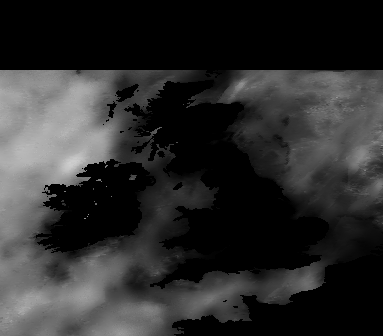

In [98]:
x[-1].repeat(3,1,1).rgb

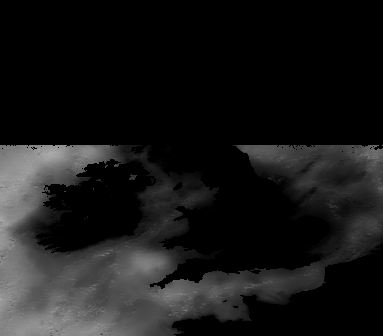

In [78]:
item[0][0][-1].repeat(3,1,1).rgb

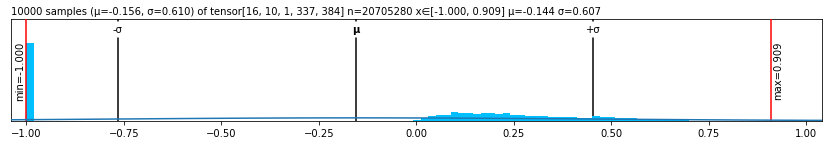

In [9]:
item[0].plt